# Instructions
The following code was designed in order to score motion/freezing data for a single video file. It allows for cropping of the video frame to reduce the influence of tethers. Motion is detected by capturing the number of pixels whose frame by frame grayscale change exceeds a user-defined motion threshold.  Freezing is then assessed by calculating when motion drops below a user-defined freezing threshold.  The user is able to visualize raw video, animal motion, and whether an animal is deemed to be freezing in order optimize parameters.  Final output is a csv that provides frame-by-frame motion and freezing across the session.  Additionally, a summary file can be generated that allows the user to get motion/freezing for specified time bins.  With the exception of setting the file path and a small number of parameters, the user can run through code.  

***Once parameters are found that work well, batch processing of multiple videos can be performed using FreezeAnalysis_BatchProcess.ipynb.***

---
# 1. Load Necessary Packages
The following code loads neccessary packages and need not be changed by the user.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
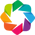

In [1]:
%load_ext autoreload
%autoreload 2
import os
import holoviews as hv
import numpy as np
import pandas as pd
import FreezeAnalysis_Functions as fz
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt_raw
import matplotlib.patches as patches
import cv2


---
# 2. User Sets Directory and File Information

`dpath` : The directory path of the folder containing the video to be processed. Note that if you are using a Windows path with backslashes, place an ‘r’ in front of the directory path to avoid an error (e.g., r’\Users\DeniseCaiLab\Videos’).

`file` : The filename of the video, including the file extension.

`start` : The frame of the video on which to begin processing.  0 is the first frame.  By knowing the video’s frame rate (e.g., 30 frames per second), the user can start processing the video at a specific timepoint.  For instance, to begin processing 20 seconds into the video, once the animal has been placed into the arena, one could enter 600 if the frame rate were 30 frames per second.  If you are uncertain of your video’s frame rate, this information will be printed by ezTrack when Cell 3 is run.

`end` : The frame of the video to end processing on.  If the user would like to process from the start frame to the end of the video, this can be set to None.

`dsmpl` : The amount to down-sample each frame.  If processing is going slow, down-sampling can help. A value of 1 indicates no down-sampling, while a value of 0.25 indicates that the frame will be down-sampled to ¼ the original size.  Note that if down-sampling is performed, all pixel coordinate output will be in the dimensions of the down-sampled video.

`stretch` : Allows the user to alter the aspect ratio of the presented output.  This is useful when videos have irregular dimensions and are difficult to see (e.g., an aspect ratio of 1:100).  The width/height will be scaled by the factor provided. Note that this only affects the appearance of visualizations and does not modify the video or the interpretation of the output.

***Processing going slow?  Consider downsampling!***  Often times tracking does not not require 1080p or whatever high def resolution videos are sometimes acquired using. Try setting `dsmpl` to something lower than 1 to implement downsampling (1=no downsampling). For example, if set to 0.25, each frame will be downsampled to 1/4 the original size.  Note that the same downsampling value should be used during calibration.

In [2]:
video_dict = {
    #'dpath'   : "../PracticeVideos/",  
    'dpath'   : "/Users/kang/Documents/GitHub/Imaging Analysis/Motion_Extraction/Put_Videos_Here/",
    #'file'    : 'Ka-DS2-P5_5-S10-Sucrose.mp4',
    #'file'    : 'Ka-DS1-P5_5-S35-Water.mp4',
    'file'    : '5_2022-10-08_13-37-08-Ka-DS12-P5_5-S6-Water.mp4',
    'start'   : 0, 
    'end'     : None,
    'dsmpl'   : 1,
    'stretch' : dict(width=1, height=1)
}


---
# 3. Load Video and Crop Frame if Desired
To crop video frame, after running code below, select box selection tool beneath image (square with a plus sign).  To start drawing region to be included in analyis, double click image.  Double click again to finalize region.  If you decide to change region, it is best to rerun this cell and subsequent steps.

If the size of the image is too small/large, alter the first line of code.  100 is the standard size.  200 will produce an image 2x the size, and so on.

In [4]:
%%output size=100

img_crp, video_dict = fz.LoadAndCrop(video_dict, cropmethod="Box")
img_crp

file: /Users/kang/Documents/GitHub/Imaging Analysis/Motion_Extraction/Put_Videos_Here/5_2022-10-08_13-37-08-Ka-DS12-P5_5-S6-Water.mp4
total frames: 73591
nominal fps: 29.77218258405602
dimensions (h x w): 360,640


:Overlay
   .Image.I    :Image   [x,y]   (z)
   .Polygons.I :Polygons   [x,y]

---
# 4. Analyze Motion Across Session

### 4a. User Sets Motion Threshold
Below, user sets `mt_cutoff`, the grayscale difference value required for a pixel to be counted as changing from one frame to the next. Can be determined using FreezeAnalysis_Calibration.ipynb.

### 4b. Detect Motion and Plot
Here, code loops through all frames and detects number of pixels whose grayscale change exceeds `mt_cutoff` per frame.  In addition to interactive plot options, one can also change the plot size by changing h and w in code below (e.g `h,w = 300,2000`)

In [5]:
mt_cutoff = 10   # Below, user sets mt_cutoff, the grayscale difference value required for a pixel to be counted as changing from one frame to the next. Can be determined using FreezeAnalysis_Calibration.ipynb.



In [6]:
%%output size=100

h,w = 300,1000 



100%|██████████████████████████████████▉| 73589/73590 [00:33<00:00, 2192.19it/s]


total frames processed: 73589

BoxEdit(data={'xs': [None], 'ys': [None], 'x0': [150.49804305283755], 'x1': [384.7054794520548], 'y0': [342.7463235294117], 'y1': [195.92279411764704]})
/Users/kang/Documents/GitHub/Imaging Analysis/Motion_Extraction/Put_Videos_Here/5_2022-10-08_13-37-08-Ka-DS12-P5_5-S6-Water_Selected_Region.png
Figure Exported
Data Exported


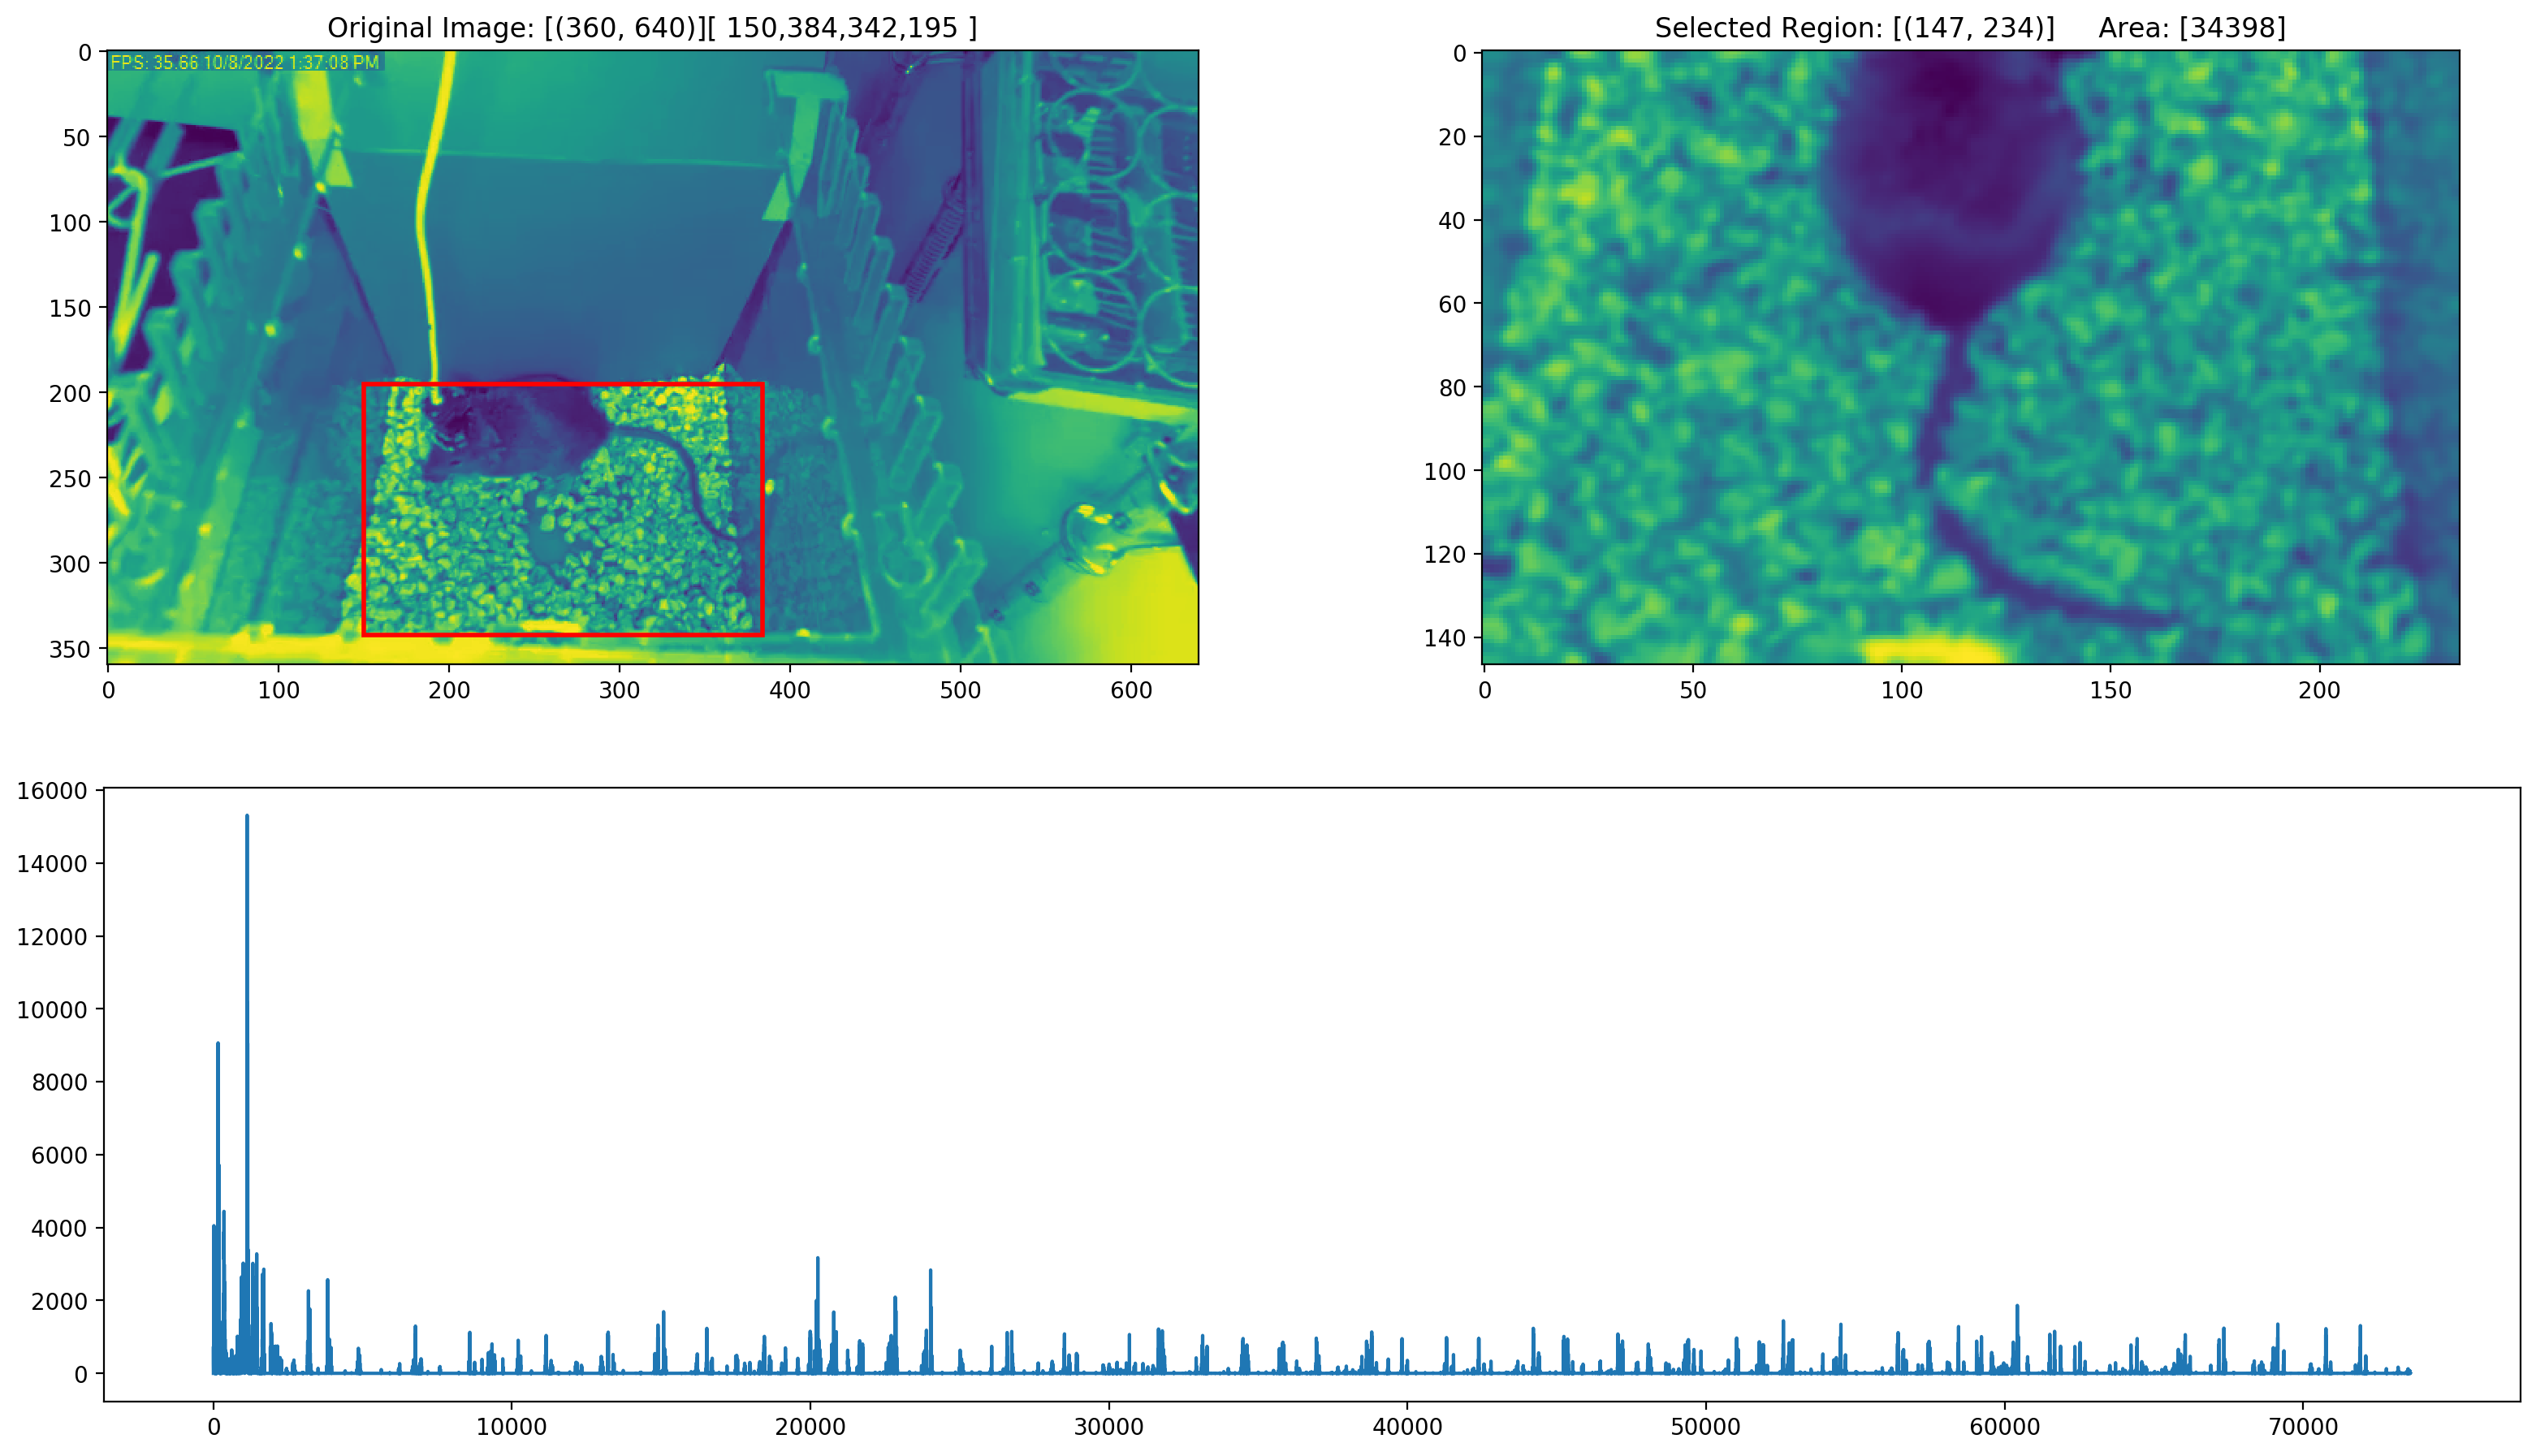

In [7]:

#####################################################################
#. Do Motion First,  then Signal_Light_1, Signal_Light_2, Signal_Light_3

Detect_Choice = 'motion'  #. 'motion' or 'light'

#####################################################################

if (Detect_Choice == 'motion'): 
    # For detecting motion (# Change in Pixel)
    Motion, motion_frame_old = fz.Measure_Motion(video_dict, mt_cutoff, SIGMA=1)  

    
elif (Detect_Choice == 'light'):
    # For detecting Light (averaged intensity values of current frame)
    Motion, light_frame_old = fz.Measure_Light(video_dict, mt_cutoff, SIGMA=1)  
    



plt_mt = hv.Curve((np.arange(len(Motion)),Motion),'Frame','Pixel Change').opts(
    height=h,width=w,line_width=1,color="steelblue",title="Motion Across Session")
plt_mt



# Get Example Image

if(Detect_Choice == 'motion'):
    cap = cv2.VideoCapture(video_dict['fpath'])
    ret, frame = cap.read() 
    Example_Frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Get Selection Coordinates 
    print(video_dict.get('crop'))
    a = video_dict.get('crop')
    #a.data['x0']
    x0 = int(min(a.data['x0']))
    x1 = int(min(a.data['x1']))
    y0 = int(min(a.data['y0']))
    y1 = int(min(a.data['y1']))
    wid = abs(x0-x1)
    hei = abs(y0-y1)

    fig = plt_raw.figure(figsize =(19.2, 10.8), dpi = 200.0)
    ax = fig.add_subplot(2,2 ,1)
    ax.imshow(Example_Frame, interpolation='nearest')

    # Create a Rectangle patch
    rect = patches.Rectangle((x0, y1), wid, hei, linewidth=2, edgecolor='r', facecolor='none')

    ax.add_patch(rect)
    plt_raw.title('Original Image: '+'['+ str(Example_Frame.shape)+ ']'+'[ '+ str(x0) + ',' +str(x1) + ',' +str(y0) + ',' +str(y1) + ' ]')



    ax = fig.add_subplot(2,2 ,2)
    # display cropped image    
    plt_raw.imshow(motion_frame_old, interpolation='nearest')
    plt_raw.title('Selected Region: ' + '['+ str(motion_frame_old.shape)+ ']'+ '     Area: [' + str(wid * hei) + ']' )


    ax = fig.add_subplot(2,1 ,2)
    plt_raw.plot(Motion)

    IOUTDIR = os.path.splitext(video_dict['fpath'])[0] + '_Selected_Region' + '.png'
    print(IOUTDIR)
    # savefilename = os.path.join(Save_Path, filename)
    plt.savefig(IOUTDIR)
    #plt_perievent_traces.close()
    print('Figure Exported')
    # print(motion_frame_old.shape)
    #plt_raw.show()

    
    
# Ka Added for exporting trace to excel
####################################
#   Export data as CSV file
# for TimeStampExport to csv

Motion_label = 'Motion'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'
#Motion_label = 'Light_3'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'

temp = pd.DataFrame(Motion, columns = [Motion_label])
Motion_panda = temp.squeeze()               #################     Left_LED_Traces_panda

    


#filename = 'Motion_'+ video_dict['file'].split(".")[0]  + '.csv'
IOUTDIR = os.path.splitext(video_dict['fpath'])[0] + '_MotionExtract_NotAlign_Step1' + '.csv'

if os.path.isfile(IOUTDIR ):  #  if output link already exist        
        
        temp = pd.read_csv(IOUTDIR)
        temp[Motion_label]  = Motion_panda  # add this back to existing dataframe
        temp.to_csv(IOUTDIR, mode='w', index=False, header=True)

        
if not os.path.isfile(IOUTDIR ):  #  only create output folder if output link does not already exist
        Motion_panda.to_csv(IOUTDIR, mode='w', index=False, header=True)
        
        ##. Append original_video_area, cropped_video_area, x0, x1, y0, y1 (crop coordinate)    
        Motion_label = 'original_video_coor, cropped_video_coor, cropped_video_area,  x0, x1, y0, y1 (crop coordinate)'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'
        temp = pd.DataFrame([str(Example_Frame.shape), str(motion_frame_old.shape),wid * hei, x0,x1,y0,y1], columns = [Motion_label])
        Motion_panda = temp.squeeze()               #################     Left_LED_Traces_panda
        
        temp = pd.read_csv(IOUTDIR)
        temp[Motion_label]  = Motion_panda  # add this back to existing dataframe
        temp.to_csv(IOUTDIR, mode='w', index=False, header=True)
        
print('Data Exported')      

## ---
# 2. Export signal light (light 1, light 2 , light 3)
The following code runs three times

In [8]:
%%output size=100

img_crp, video_dict = fz.LoadAndCrop(video_dict, cropmethod="Box")
img_crp

file: /Users/kang/Documents/GitHub/Imaging Analysis/Motion_Extraction/Put_Videos_Here/5_2022-10-08_13-37-08-Ka-DS12-P5_5-S6-Water.mp4
total frames: 73591
nominal fps: 29.77218258405602
dimensions (h x w): 360,640


:Overlay
   .Image.I    :Image   [x,y]   (z)
   .Polygons.I :Polygons   [x,y]

In [11]:

#####################################################################
#. Do Motion First,  then Signal_Light_1, Signal_Light_2, Signal_Light_3

Motion_label = 'Light_3'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'
Detect_Choice = 'light'  #. 'motion' or 'light'
#Detect_Choice = 'motion'  #. 'motion' or 'light'


#####################################################################

if (Detect_Choice == 'motion'): 
    # For detecting motion (# Change in Pixel)
    Motion, motion_frame_old = fz.Measure_Motion(video_dict, mt_cutoff, SIGMA=1)  

    
elif (Detect_Choice == 'light'):
    # For detecting Light (averaged intensity values of current frame)
    Motion, light_frame_old = fz.Measure_Light(video_dict, mt_cutoff, SIGMA=1)  
    



plt_mt = hv.Curve((np.arange(len(Motion)),Motion),'Frame','Pixel Change').opts(
    height=h,width=w,line_width=1,color="steelblue",title="Light Across Session")
plt_mt


# Ka Added for exporting trace to excel
####################################
#   Export data as CSV file
# for TimeStampExport to csv

#Motion_label = 'Motion'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'
#Motion_label = 'Light_2'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'

temp = pd.DataFrame(Motion, columns = [Motion_label])
Motion_panda = temp.squeeze()               #################     Left_LED_Traces_panda

    


#filename = 'Motion_'+ video_dict['file'].split(".")[0]  + '.csv'
IOUTDIR = os.path.splitext(video_dict['fpath'])[0] + '_MotionExtract_NotAlign_Step1' + '.csv'

if os.path.isfile(IOUTDIR ):  #  if output link already exist        
        
        temp = pd.read_csv(IOUTDIR)
        temp[Motion_label]  = Motion_panda  # add this back to existing dataframe
        temp.to_csv(IOUTDIR, mode='w', index=False, header=True)

        
if not os.path.isfile(IOUTDIR ):  #  only create output folder if output link does not already exist
        Motion_panda.to_csv(IOUTDIR, mode='w', index=False, header=True)
        
        ##. Append original_video_area, cropped_video_area, x0, x1, y0, y1 (crop coordinate)    
        Motion_label = 'original_video_coor, cropped_video_coor, cropped_video_area,  x0, x1, y0, y1 (crop coordinate)'   #. 'Motion',  'Light_1', 'Light_2', 'Light_3'
        temp = pd.DataFrame([str(Example_Frame.shape), str(motion_frame_old.shape),wid * hei, x0,x1,y0,y1], columns = [Motion_label])
        Motion_panda = temp.squeeze()               #################     Left_LED_Traces_panda
        
        temp = pd.read_csv(IOUTDIR)
        temp[Motion_label]  = Motion_panda  # add this back to existing dataframe
        temp.to_csv(IOUTDIR, mode='w', index=False, header=True)
        
print('Data Exported')
            
plt_mt


100%|██████████████████████████████████▉| 73589/73590 [00:19<00:00, 3752.32it/s]


total frames processed: 73589

Data Exported


:Curve   [Frame]   (Pixel Change)

In [20]:
# display_dict = {
#     'start'      : 1200, 
#     'end'        : 1350,
#     'fps'        : 30,
#     'resize'     : None,
#     'save_video' : False
# }

# fz.PlayVideo(video_dict,display_dict,Freezing,mt_cutoff,SIGMA=1)